In [1]:
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import spectrogram, welch

In [3]:
import numpy as np

In [4]:
import pickle, glob

In [5]:
import sys,os

In [6]:
from scipy.fftpack import fft

In [7]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\buffer_bci-master\\tutorial\\BCI-project-master'

In [8]:
#C:\Users\HP\Desktop\buffer_bci-master\tutorial\BCI-project-master
Path_FieldTrip = "../../dataAcq/buffer/python"
sys.path.append( Path_FieldTrip)

import FieldTrip

In [9]:
Path_Preproc = "../../python/signalproc"
sys.path.append(Path_Preproc)


import preproc

In [10]:
ch = '''  1) Matched : FP1	 ->	 FP1
  2) Matched : FPz	 ->	 FPz
  3) Matched : FP2	 ->	 FP2
  4) Matched : AF7	 ->	 AF7
  5) Matched : AFz	 ->	 AFz
  6) Matched : AF8	 ->	 AF8
  7) Matched : F3	 ->	 F3
  8) Matched : Fz	 ->	 Fz
  9) Matched : F4	 ->	 F4
 10) Matched : FC5	 ->	 FC5
 11) Matched : FC1	 ->	 FC1
 12) Matched : FC2	 ->	 FC2
 13) Matched : FC6	 ->	 FC6
 14) Matched : T9	 ->	 T9
 15) Matched : C3	 ->	 C3
 16) Matched : Cz	 ->	 Cz
 17) Matched : C4	 ->	 C4
 18) Matched : T10	 ->	 T10
 19) Matched : CP1	 ->	 CP1
 20) Matched : CP2	 ->	 CP2
 21) Matched : P3	 ->	 P3
 22) Matched : Pz	 ->	 Pz
 23) Matched : P4	 ->	 P4
 24) Matched : TP9	 ->	 TP9
 25) Matched : P7	 ->	 P7
 26) Matched : POz	 ->	 POz
 27) Matched : O1	 ->	 O1
 28) Matched : Oz	 ->	 Oz
 29) Matched : O2	 ->	 O2
 30) Matched : TP10	 ->	 TP10'''

In [11]:
ch_32 = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32[str(i.split(')')[0].replace(' ',''))] = str(i.split('->')[-1].replace('	 ',''))
ch_32['1']

'FP1'

In [12]:
ch_32_r = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32_r[str(i.split('->')[-1].replace('	 ',''))] = str(i.split(')')[0].replace(' ',''))

Processin the data form the file 4 up to 15

In [13]:
 # 0 - left, 1 -right, 2 - both

values_hands = {'0':'left', '1':'right', '2':'both', '3':'none' }

In [14]:
exp = []
exp_name = []
for i in range(16,22):
    file = './data/training_data_imagined_movement_'
    print(i, file+str(i)+'.pk')
    f = open(file+str(i)+'.pk', 'rb')
    exp_name.append(file+str(i))
    exp.append(pickle.load(f))

16 ./data/training_data_imagined_movement_16.pk
17 ./data/training_data_imagined_movement_17.pk
18 ./data/training_data_imagined_movement_18.pk
19 ./data/training_data_imagined_movement_19.pk
20 ./data/training_data_imagined_movement_20.pk
21 ./data/training_data_imagined_movement_21.pk


In [15]:
len(exp)

6

In [16]:
exp[2]['data'][0].shape

(750, 37)

In [17]:
left_hand_mov = []
right_hand_mov = []
both_hands_mov = []
no_hands_mov = []



#Counters

right = 0
left = 0
both = 0
none = 0


for n_exp in range(len(exp)):
    print(' ***********   Experiment  '+exp_name[n_exp]+'   *********** ')
    data           =   np.array(exp[n_exp]['data'])   #data support variable
    data           =   np.transpose(data)
    #print(data.shape)
    data           =   preproc.detrend(data)
    data           =   preproc.spatialfilter(data, type = 'spatialfilter')
    data, freqs    =   preproc.powerspectrum(data,dim = 1,fSample=exp[n_exp]['hdr'].fSample)
    
    
    #data,freqIdx  =   preproc.selectbands(data,dim=1,band=freqbands,bins=freqs)  #Check out later
    
    #print(len(freqs))
    
    print(data.shape)
    
    n_events = data.shape[2]
    for event in range(n_events):
        
        print(exp[n_exp]['events'][event].value[0])
        
        if exp[n_exp]['events'][event].value[0] == 0:
            print('left')
            left = left + 1
            left_hand_mov.append(data[:,:,event])
        
        
        if exp[n_exp]['events'][event].value[0] == 1:
            print('right')
            right = right +1
            right_hand_mov.append(data[:,:,event])
        
            
        if exp[n_exp]['events'][event].value[0] == 2:
            print('both')
            both = both + 1
            both_hands_mov.append(data[:,:,event])
            
        if exp[n_exp]['events'][event].value[0] == 3:
            print('none')
            none = none + 1
            no_hands_mov.append(data[:,:,event])           
        
    print('left',left)
    print('right',right)
    print('both',both)
    print('none',none)
    print('-'*80)
        
left_hand_mov    =   np.array(left_hand_mov)
right_hand_mov   =   np.array(right_hand_mov)
both_hands_mov   =   np.array(both_hands_mov)
no_hands_mov     =   np.array(no_hands_mov)

 ***********   Experiment  ./data/training_data_imagined_movement_16   *********** 
(37, 375, 24)
3
none
2
both
2
both
1
right
3
none
3
none
2
both
1
right
2
both
1
right
0
left
1
right
0
left
2
both
1
right
0
left
2
both
3
none
3
none
1
right
0
left
3
none
0
left
0
left
left 6
right 6
both 6
none 6
--------------------------------------------------------------------------------
 ***********   Experiment  ./data/training_data_imagined_movement_17   *********** 
(37, 375, 24)
1
right
0
left
0
left
3
none
2
both
0
left
2
both
1
right
2
both
0
left
3
none
2
both
1
right
3
none
2
both
3
none
1
right
1
right
0
left
2
both
0
left
3
none
1
right
3
none
left 12
right 12
both 12
none 12
--------------------------------------------------------------------------------
 ***********   Experiment  ./data/training_data_imagined_movement_18   *********** 
(37, 375, 24)
1
right
3
none
3
none
0
left
2
both
1
right
1
right
0
left
2
both
2
both
3
none
0
left
2
both
1
right
0
left
1
right
2
both
0
left
3
n

In [18]:
print('left',left_hand_mov.shape)
print('right',right_hand_mov.shape)
print('both',both_hands_mov.shape)
print('none',no_hands_mov.shape)

left (36, 37, 375)
right (36, 37, 375)
both (36, 37, 375)
none (36, 37, 375)


In [19]:
frq_20 = freqs[np.where(freqs < 20)]
len(frq_20)

60

In [20]:
# outliers removal for left hand

goodtr, badtr = preproc.outlierdetection(left_hand_mov,dim=0)
print(len(goodtr))
left_goodtr = left_hand_mov[goodtr,:,:]

33


In [21]:
# outliers removal for right hand

goodtr, badtr = preproc.outlierdetection(right_hand_mov,dim=0)
print(len(goodtr))
right_goodtr = right_hand_mov[goodtr,:,:]

35


In [22]:
# computing grand averages
left_good_avg = np.mean(left_goodtr, axis=0)
right_good_avg = np.mean(right_goodtr, axis=0)

In [23]:
print(left_good_avg.shape)
print(right_good_avg.shape)

(37, 375)
(37, 375)


In [47]:
#select frequency from 8 Hz to 12 Hz

left_8_12,freqIdx  =   preproc.selectbands(left_good_avg,dim=1,band=[8,12],bins=freqs)
right_8_12,freqIdx  =   preproc.selectbands(right_good_avg,dim=1,band=[8,12],bins=freqs)

In [48]:
frq_8_12 =  freqs[freqIdx]

0


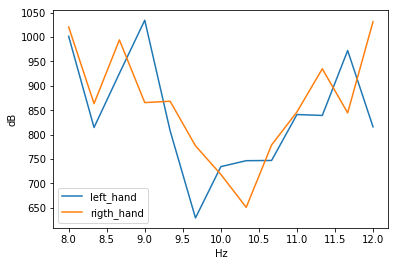

1


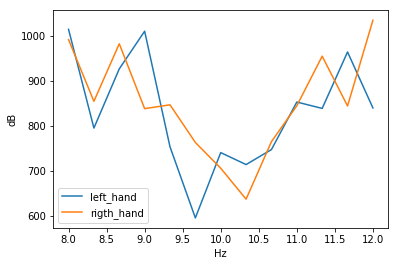

2


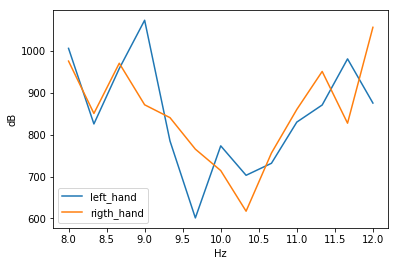

3


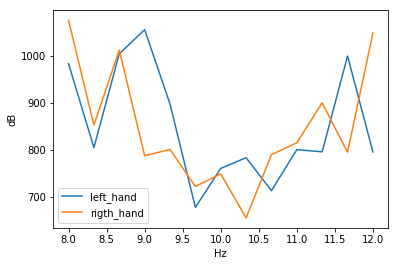

4


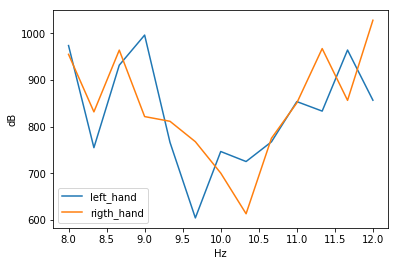

5


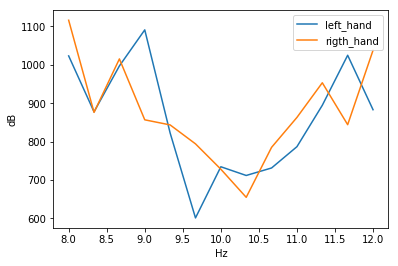

6


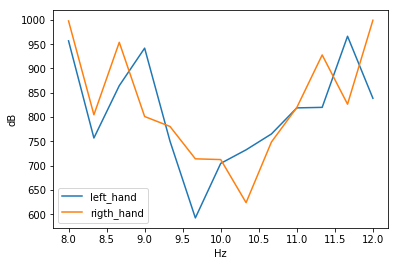

7


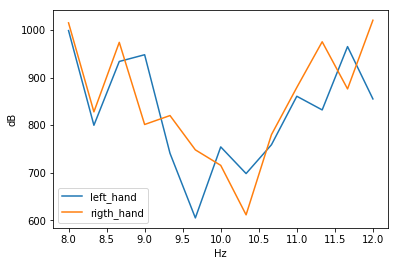

8


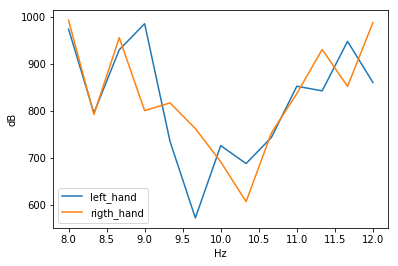

9


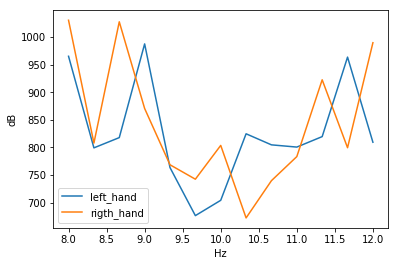

10


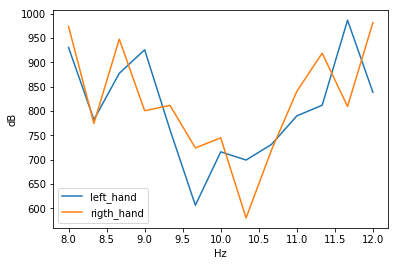

11


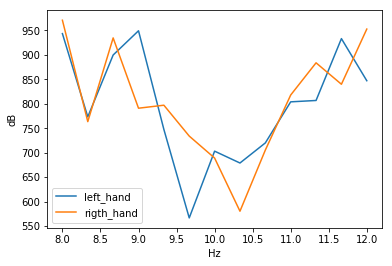

12


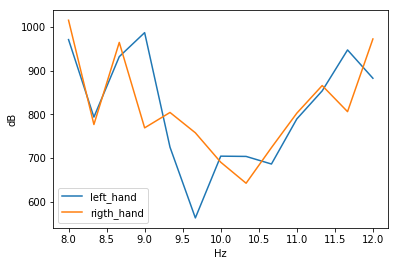

13


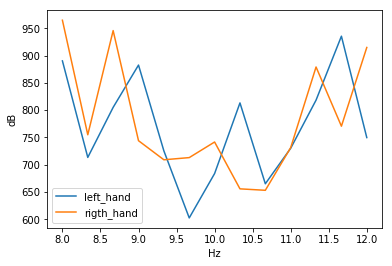

14


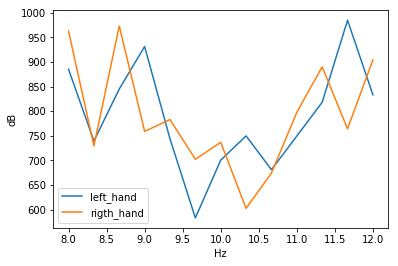

15


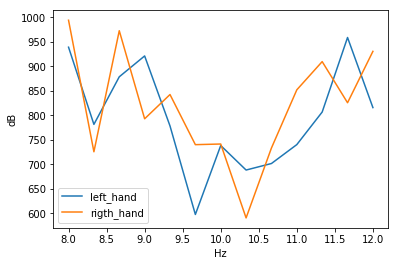

16


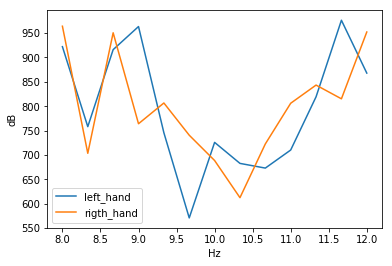

17


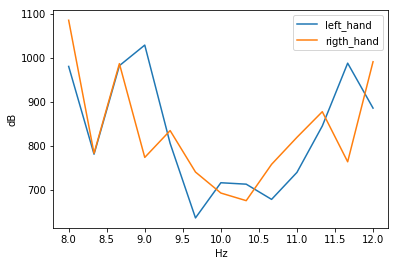

18


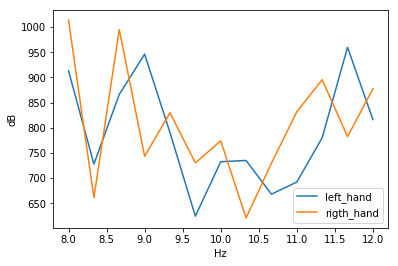

19


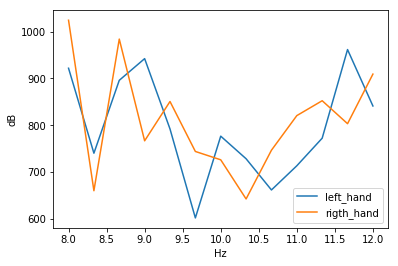

20


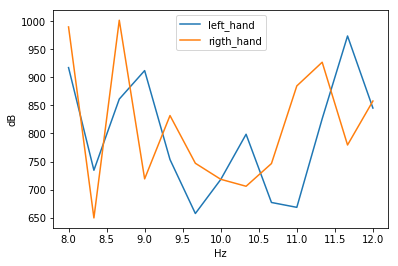

21


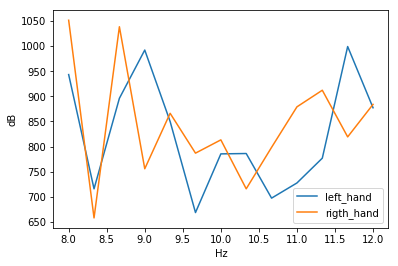

22


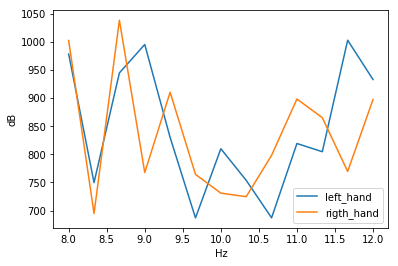

23


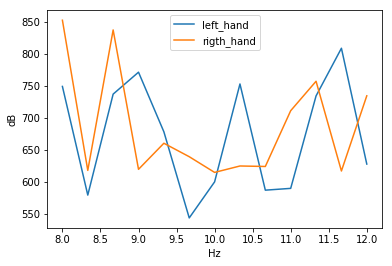

24


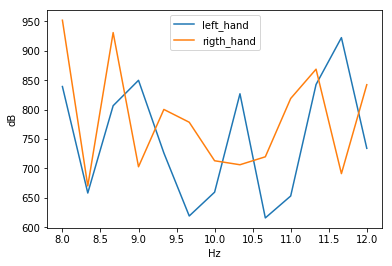

25


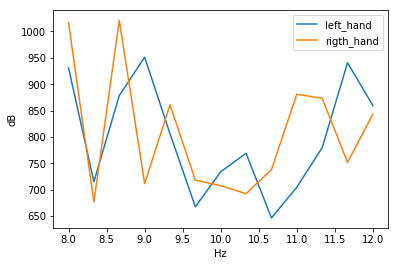

26


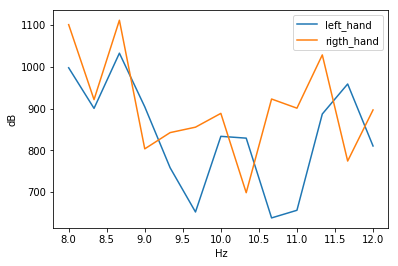

27


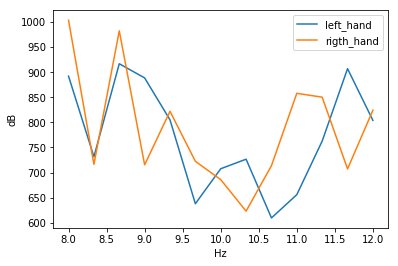

28


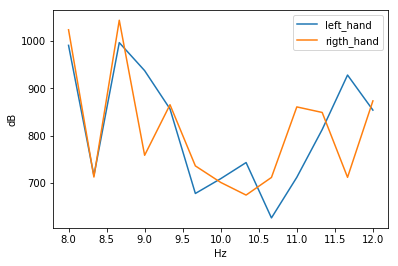

29


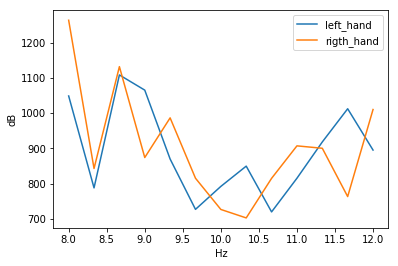

30


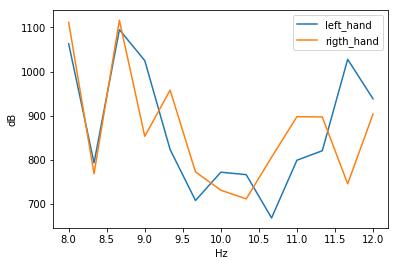

31


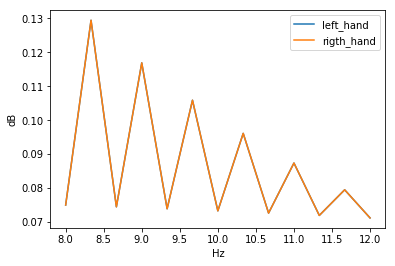

32


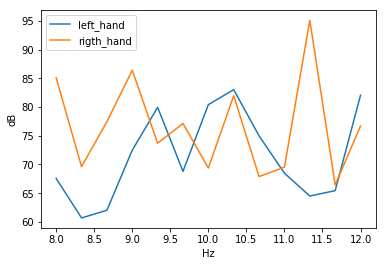

33


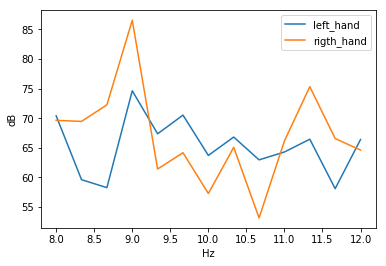

34


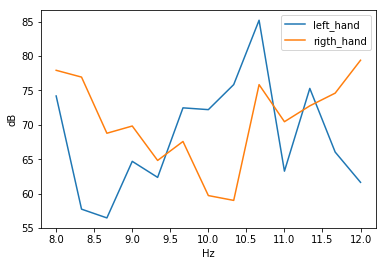

35


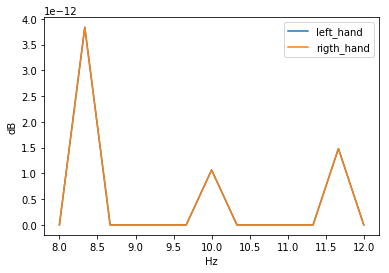

36


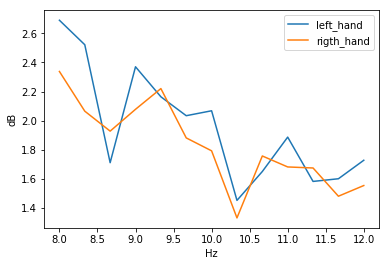

In [50]:
# left (blue) vs right (orange) plots 

for ch in range(left_good_avg.shape[0]):
    print(ch)
    plt.plot(frq_8_12,left_8_12[ch,:], label='left_hand')
    plt.plot(frq_8_12,right_8_12[ch,:], label='rigth_hand')
    plt.xlabel('Hz')
    plt.ylabel('dB')
    plt.legend()
    plt.show()

In [27]:
# outliers removal for both hand

goodtr, badtr = preproc.outlierdetection(both_hands_mov,dim=0)
print(len(goodtr))
both_goodtr = both_hands_mov[goodtr,:,:]

36


In [28]:
# outliers removal for no hand

goodtr, badtr = preproc.outlierdetection(no_hands_mov,dim=0)
print(len(goodtr))
none_goodtr = no_hands_mov[goodtr,:,:]

32


In [29]:
# computing grand averages
both_good_avg = np.mean(both_goodtr, axis=0)
none_good_avg = np.mean(none_goodtr, axis=0)

In [30]:
print(both_good_avg.shape)
print(none_good_avg.shape)

(37, 375)
(37, 375)


In [51]:
#select frequency from 8 Hz to 12 Hz

both_8_12,freqIdx  =   preproc.selectbands(both_good_avg,dim=1,band=[8,12],bins=freqs)
none_8_12,freqIdx  =   preproc.selectbands(none_good_avg,dim=1,band=[8,12],bins=freqs)

0


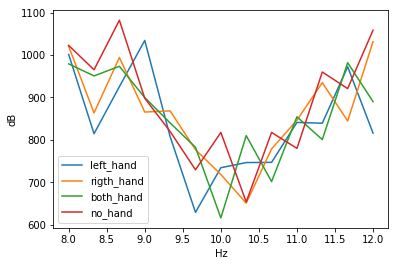

1


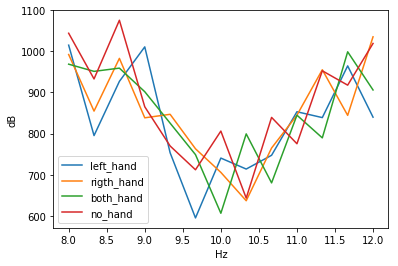

2


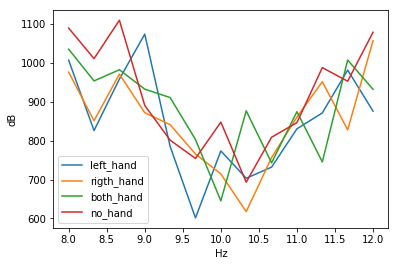

3


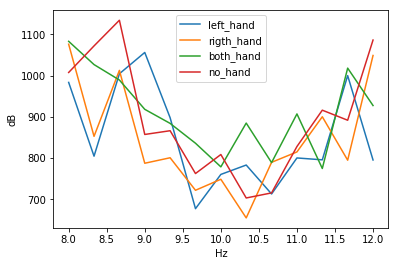

4


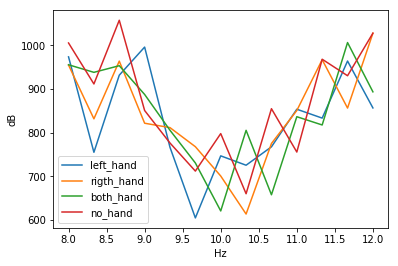

5


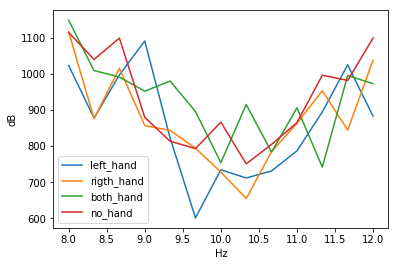

6


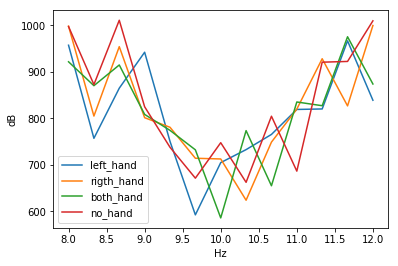

7


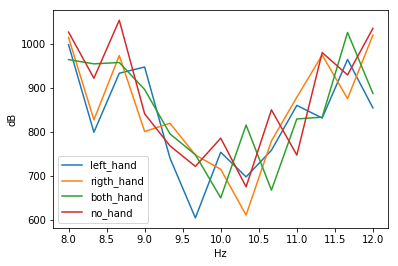

8


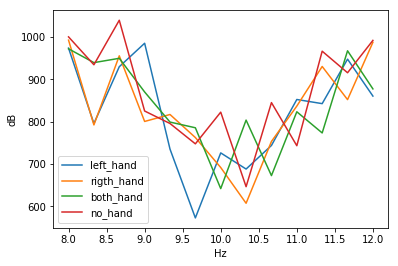

9


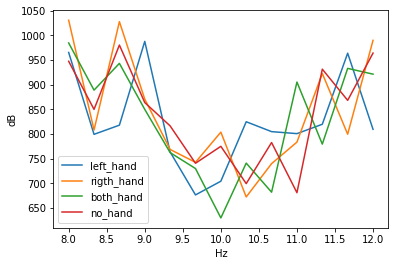

10


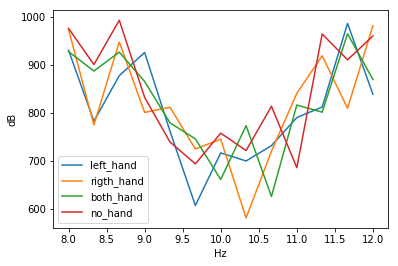

11


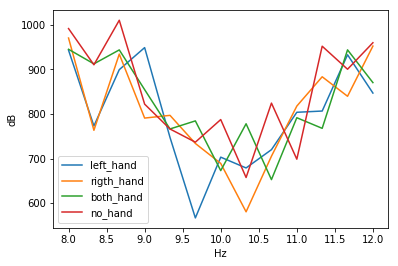

12


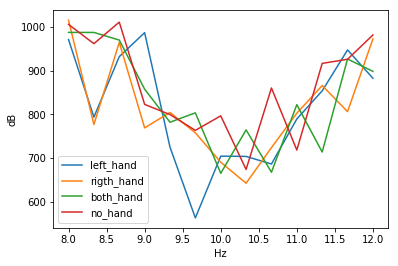

13


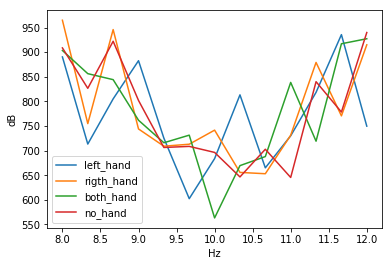

14


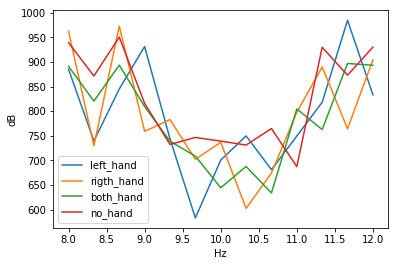

15


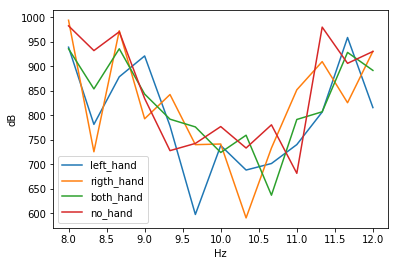

16


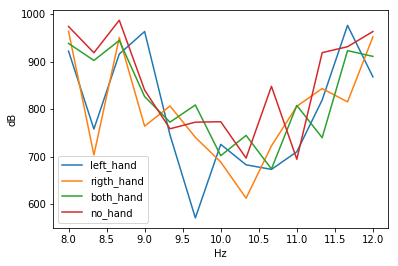

17


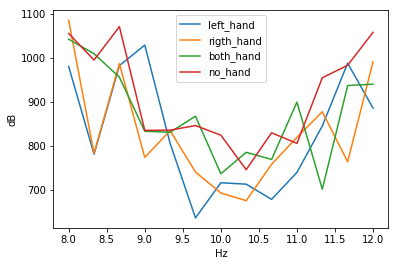

18


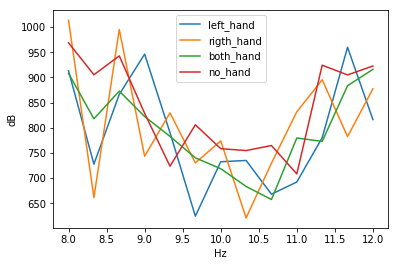

19


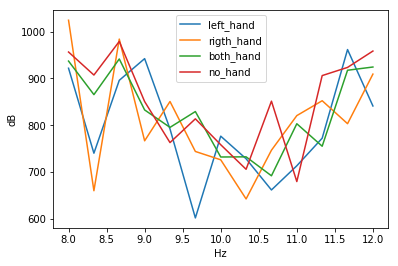

20


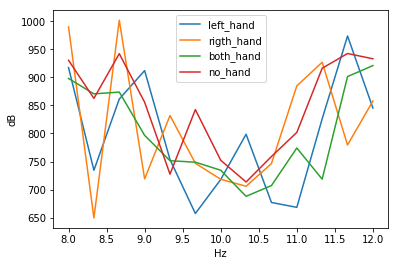

21


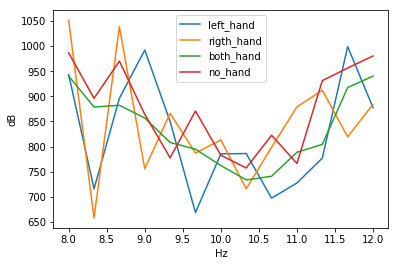

22


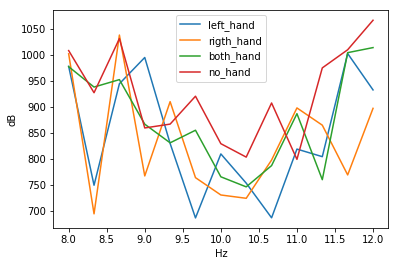

23


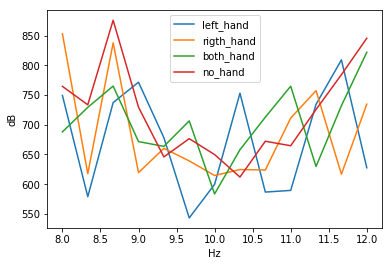

24


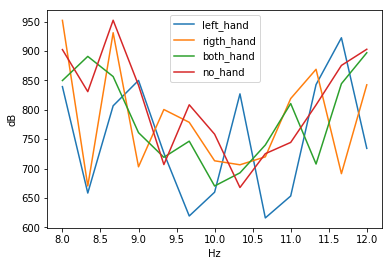

25


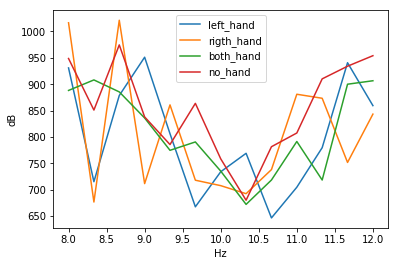

26


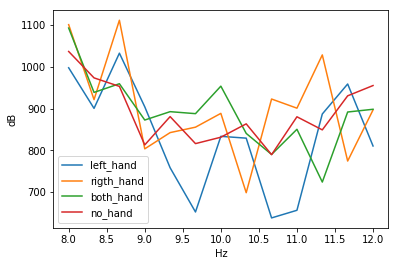

27


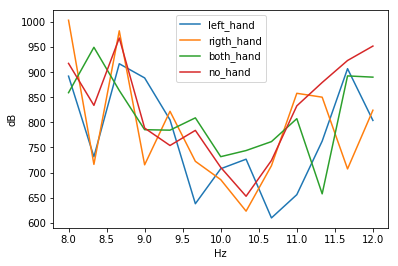

28


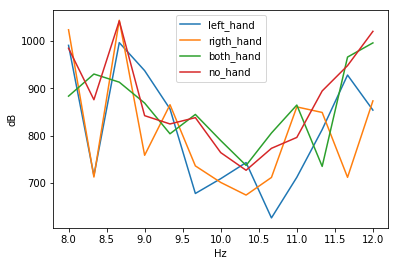

29


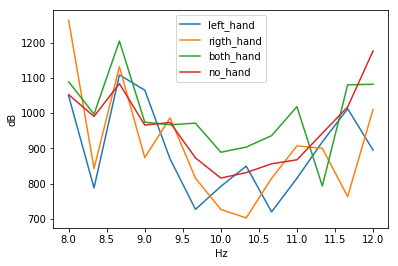

30


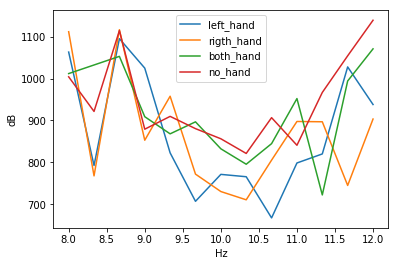

31


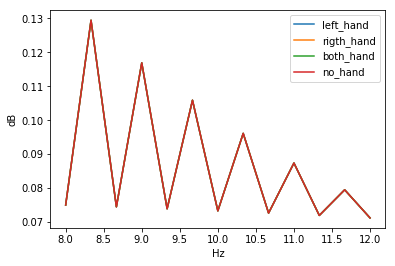

32


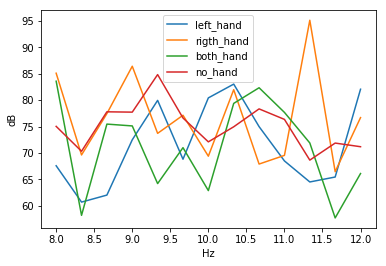

33


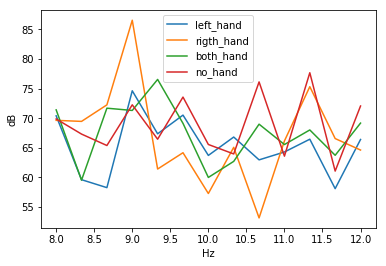

34


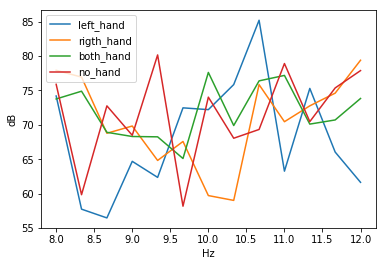

35


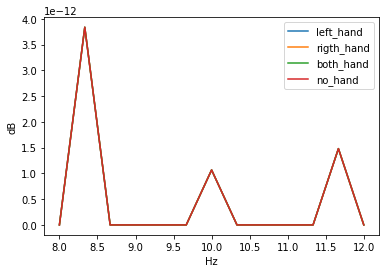

36


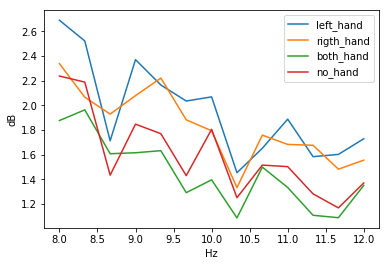

In [52]:
# left (blue) vs right (orange) vs both vs none plots 

for ch in range(left_good_avg.shape[0]):
    print(ch)
    plt.plot(frq_8_12,left_8_12[ch,:], label='left_hand')
    plt.plot(frq_8_12,right_8_12[ch,:], label='rigth_hand')
    plt.plot(frq_8_12,both_8_12[ch,:], label='both_hand')
    plt.plot(frq_8_12,none_8_12[ch,:], label='no_hand')
    plt.xlabel('Hz')
    plt.ylabel('dB')
    plt.legend()
    plt.show()

# PCA

In [55]:
# big matrix containing left and right data

lr_Data = np.concatenate((left_goodtr[:,:,freqIdx],right_goodtr[:,:,freqIdx]), axis=0)
print(lr_Data.shape)

(68, 37, 13)


In [56]:
# Select channel

c = 14

data = lr_Data[:,c,:]

print(data.shape)

(68, 13)


In [84]:
# constuct labels
l = np.zeros((left_goodtr.shape[0],1),dtype=int)
y_r = np.ones((right_goodtr.shape[0],1),dtype=int)

y = np.concatenate((y_l,y_r), axis = 0).flatten()
print(y.shape)

(68,)


In [61]:
mu=np.mean(data,axis=0)

(13,)


In [77]:
mu=np.mean(data,axis=0)

Y=data-np.ones((len(data),1))*mu

u, s, vh = np.linalg.svd(Y, full_matrices=True)

V=vh.T

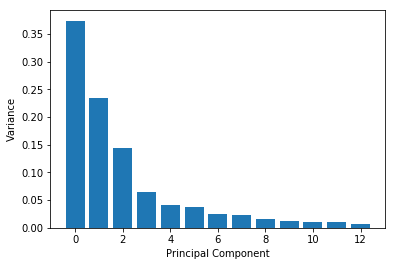

Figure 9: A barplot showing the fraction of variance (Y-axis) accounted for each principal components (X-axis)


In [70]:
x = np.arange(0,13,1)

sum_S = np.sum(s*s)

ro_V = ((s*s)/sum_S)

plt.ylabel('Variance')
plt.xlabel('Principal Component')
plt.bar(x,ro_V)
plt.show()
print('Figure 9: A barplot showing the fraction of variance (Y-axis) accounted for each principal components (X-axis)')

In [75]:
# Variance explained by firt n principal components

n = 3

print(np.sum(ro_V[0:n]*100),'%')

75.31503955657482 %


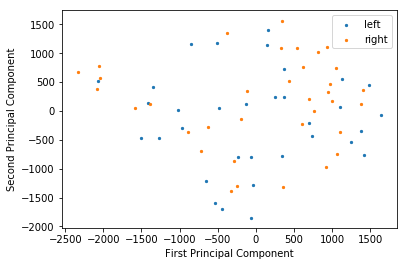

Figure 8: A scatterplot of the data projected onto the first PC (on the X-axis) and the second PC (on the Y-axis)


In [87]:
# Plot of first 2 principal components
Z=np.dot(Y,V[:,0:2])
l_index = y < 1
r_index = y > 0


plt.scatter(Z[l_index,0],Z[l_index,1],5, label = 'left')
plt.scatter(Z[r_index,0],Z[r_index,1],5, label = 'right')
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')
plt.legend()
plt.show()
print('Figure 8: A scatterplot of the data projected onto the first PC (on the X-axis) and the second PC (on the Y-axis)')

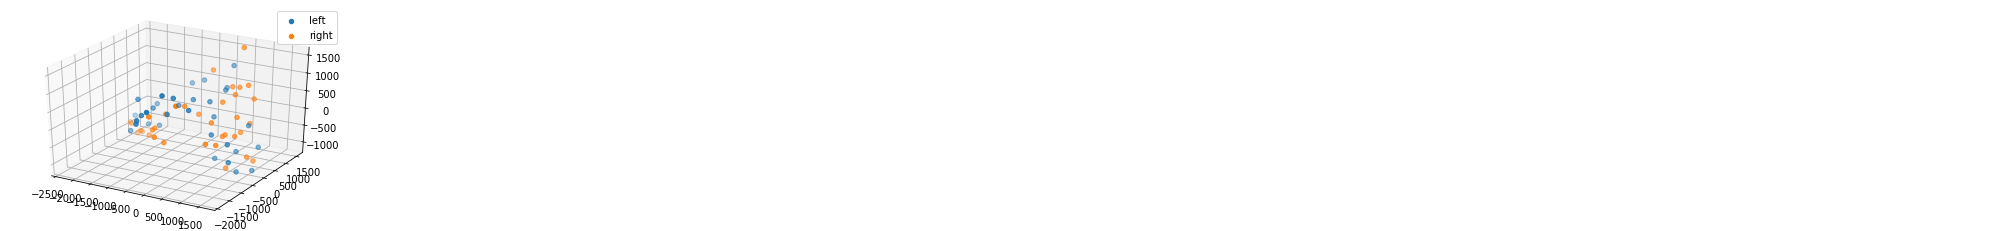

In [113]:
# Plot of first 2 principal components
from mpl_toolkits.mplot3d import Axes3D

Z=np.dot(Y,V[:,0:3])
l_index = y < 1
r_index = y > 0

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(Z[l_index,0],Z[l_index,1], Z[l_index,2], label = 'left')
ax.scatter(Z[r_index,0],Z[r_index,1], Z[r_index,2], label = 'right')
plt.legend()
plt.show()
